<a href="https://colab.research.google.com/github/weicap/MCC_Vision_Artificial/blob/main/Practica_3/Practica_3_Fourier_TemplateMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Fourier Recursiva

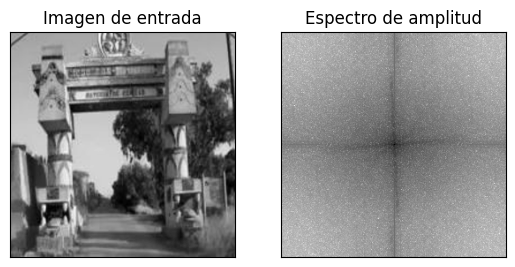

In [34]:
import numpy as np
from PIL import Image

def fft2_rc(image):
    """
    Calcula la Transformada de Fourier en 2D de una imagen utilizando la recursión de fila-columna.
    """
    
    # Aplica la Transformada de Fourier en 1D a cada fila de la imagen
    rows, cols = image.shape
    f_row = np.zeros((rows, cols), dtype=complex)
    for i in range(rows):
        f_row[i,:] = fft1(image[i,:])
    
    # Aplica la Transformada de Fourier en 1D a cada columna de la imagen resultante
    f_rc = np.zeros((rows, cols), dtype=complex)
    for i in range(cols):
        f_rc[:,i] = fft1(f_row[:,i])
        
    return f_rc

def fft1(signal):
    """
    Calcula la Transformada de Fourier en 1D de una señal utilizando la recursión.
    """
    
    # Obtiene la longitud de la señal
    n = signal.shape[0]
    
    # Si la señal tiene un solo elemento, devuelve el mismo valor
    if n == 1:
        return signal
    
    # Divide la señal en dos partes
    even = signal[::2]
    odd = signal[1::2]
    
    # Calcula la Transformada de Fourier en 1D de cada parte recursivamente
    even_fft = fft1(even)
    odd_fft = fft1(odd)
    
    # Combina los resultados para obtener la Transformada de Fourier en 1D de la señal completa
    factor = np.exp(-2j * np.pi * np.arange(n) / n)
    return np.concatenate([even_fft + factor[:int(n/2)] * odd_fft, even_fft + factor[int(n/2):] * odd_fft])
    

# Carga la imagen
img = Image.open('imagen.JPG').convert('L')
img = img.resize((256, 256))
# Convierte la imagen a un arreglo numpy
img_arr = np.array(img)

# Calcula la Transformada de Fourier en 2D de la imagen
f = fft2_rc(img_arr)

# Desplaza el espectro para que las frecuencias bajas estén en el centro
fshift = np.fft.fftshift(f)

# Calcula el espectro de amplitud
magnitude_spectrum = 255-20*np.log(np.abs(fshift))

# Visualiza la imagen y su espectro de amplitud
import matplotlib.pyplot as plt
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Imagen de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de amplitud'), plt.xticks([]), plt.yticks([])
plt.show()


# Template matching

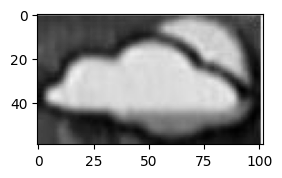

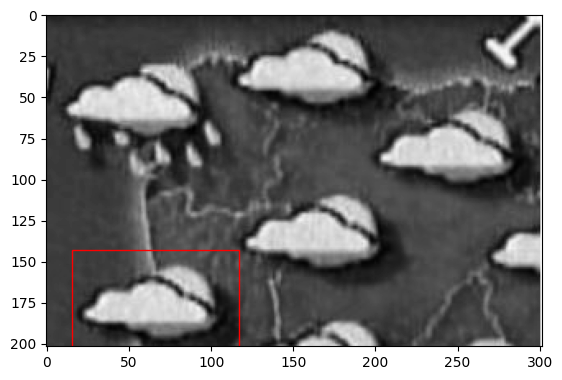

In [50]:
import numpy as np
from PIL import Image

# Cargamos la imagen original y el template
img = np.array(Image.open('imag.JPG').convert('L'))

tpl = np.array(Image.open('plantilla.JPG').convert('L'))
plt.subplot(121), plt.imshow(tpl, cmap = 'gray')

# Definimos la función para hacer template matching
def template_matching(img, tpl):
    h, w = tpl.shape
    H, W = img.shape
    scores = np.zeros((H-h+1, W-w+1))
    for i in range(H-h+1):
        for j in range(W-w+1):
            scores[i,j] = np.sum(np.square(img[i:i+h,j:j+w]-tpl))
    return scores

# Ejecutamos la función de template matching
scores = template_matching(img, tpl)

# Encontramos la posición del mejor match
y, x = np.unravel_index(np.argmin(scores), scores.shape)

# Definimos las coordenadas para el rectángulo a graficar
h, w = tpl.shape
top_left = (x, y)
bottom_right = (x+w, y+h)

# Graficamos la imagen original con el rectángulo alrededor del área detectada
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
rect = plt.Rectangle(top_left, w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()
